# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [2]:
# Use this cell for your code
import pandas as pd

df = pd.read_csv("train.csv")
print(df.shape)

(891, 12)


2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [3]:
# Use this cell for your code
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis='columns')
print(df.shape)

(891, 9)


3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [4]:
# Use this cell for your code
df['Deck'] = df['Cabin'].str[0]
df = df.drop('Cabin', axis=1)

4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [5]:
# Use this cell for your code
categorical_cols = ['Sex', 'Embarked', 'Deck']

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [6]:
# Use this cell for your code
# continuous variables
for col in ["Age", "Fare"]:
    df[col] = df[col].fillna(df[col].mean())

categorical_cols = ['Sex', 'Embarked', 'Deck']
# categorical variables
for col in categorical_cols:
    df[col] = df[col].replace(-1, df[col].mode()[0])

6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [7]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [8]:
# Use this cell for your code
df.to_csv("processed_train.csv", index=False)

# to .js
import json
dict_data = df.to_dict(orient="records")
with open("processed_train.json", "w", encoding="utf-8") as f:
    json.dump(dict_data, f, indent=4)
    
# pattern: 
# Obviously, the smaller the deck number, the higher the passenger survival rate
print(df['Deck'].value_counts())

Deck
-1    687
 2     59
 1     47
 3     33
 4     32
 0     15
 5     13
 6      4
 7      1
Name: count, dtype: int64


Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [9]:
# Use this cell for your code
import numpy as np
import pandas as pd
categorical_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Deck"]
categorical_mode = []
numerical_cols = ["Age", "Fare"]
numercial_mean = []

df = pd.read_csv("processed_train.csv")

for col in categorical_cols:
    mode = df[col].mode()[0]
    categorical_mode.append(mode)
    print("the mode of", col, ":", mode)

for col in numerical_cols:
    mean = df[col].mean()
    numercial_mean.append(mean)
    print("the median value of", col, ":", mean)

the mode of Survived : 0
the mode of Pclass : 3
the mode of Sex : 1
the mode of SibSp : 0
the mode of Parch : 0
the mode of Embarked : 2
the mode of Deck : -1
the median value of Age : 29.69911764705882
the median value of Fare : 32.204207968574636


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [10]:
# Use this cell for your code
dead = df[df['Survived']==0]
survivors = df[df['Survived']==1]

# 中位数
mean_for_survivors = survivors[numerical_cols].mean()
mean_for_dead = dead[numerical_cols].mean()
# 众数
mode_for_survivors = survivors[categorical_cols].mode().iloc[0]
mode_for_dead = dead[categorical_cols].mode().iloc[0]

# classical passenger(默认按行拼接，axis=0)
avg_survivor = pd.concat([mode_for_survivors, mean_for_survivors])
avg_dead = pd.concat([mode_for_dead, mean_for_dead])
print("survivor:\n", avg_survivor)
print("-"*30)
print("dead:\n", avg_dead)



survivor:
 Survived     1.000000
Pclass       1.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Embarked     2.000000
Deck        -1.000000
Age         28.549778
Fare        48.395408
dtype: float64
------------------------------
dead:
 Survived     0.000000
Pclass       3.000000
Sex          1.000000
SibSp        0.000000
Parch        0.000000
Embarked     2.000000
Deck        -1.000000
Age         30.415100
Fare        22.117887
dtype: float64


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

percentages of average categories in survivors:
 {'Survived': 1.0, 'Pclass': 0.39766081871345027, 'Sex': 0.6812865497076024, 'SibSp': 0.6140350877192983, 'Parch': 0.6812865497076024, 'Embarked': 0.6403508771929824, 'Deck': 0.6023391812865497}
percentages of average categories in dead:
 {'Survived': 1.0, 'Pclass': 0.6775956284153005, 'Sex': 0.8524590163934426, 'SibSp': 0.7249544626593807, 'Parch': 0.8105646630236795, 'Embarked': 0.7777777777777778, 'Deck': 0.8761384335154827}


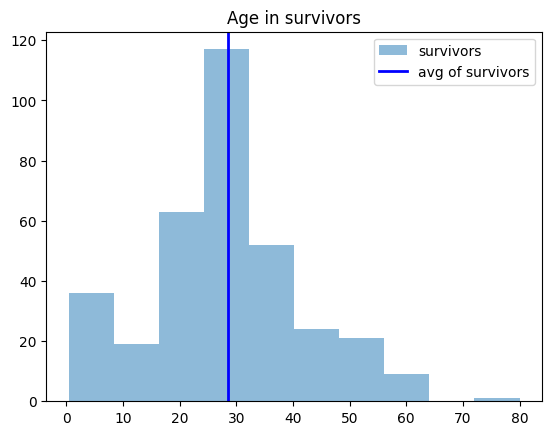

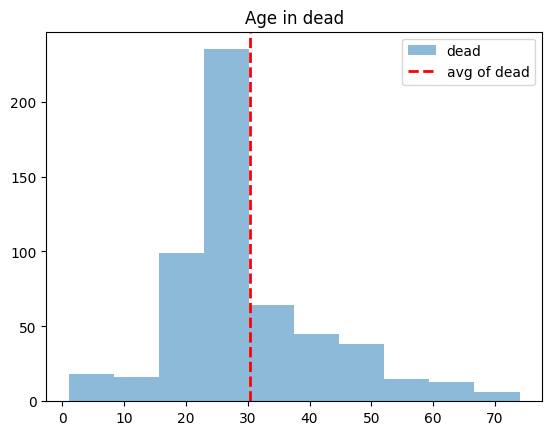

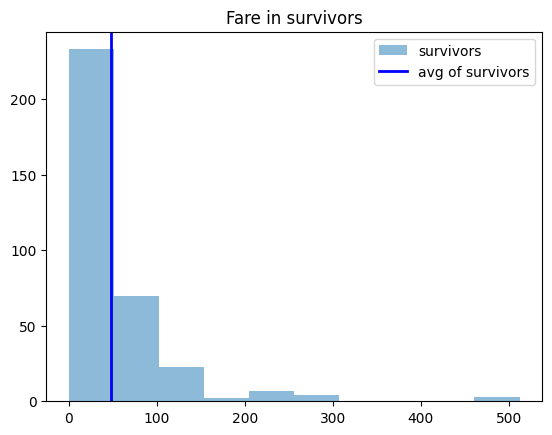

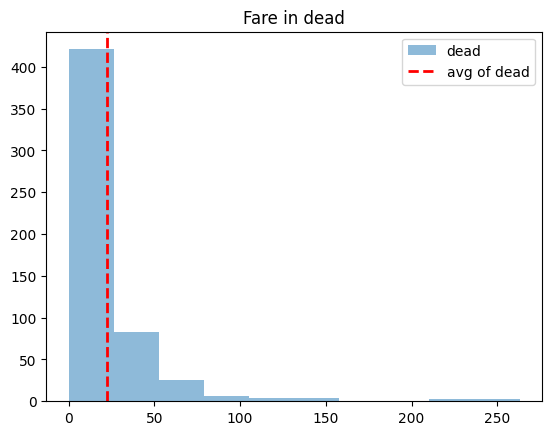

In [11]:
# Use this cell for your code
import matplotlib.pyplot as plt

# for categorical variables
perc_survivor = {}
perc_dead = {}

# 计算avg生者/死者各项categorical data在一般生者/死者中的占比
for col in categorical_cols:
    perc_survivor[col] = len(survivors[survivors[col]==avg_survivor[col]]) / len(survivors)
    perc_dead[col] = len(dead[dead[col]==avg_dead[col]]) / len(dead)

print("percentages of average categories in survivors:\n", perc_survivor)
print("percentages of average categories in dead:\n", perc_dead)

# for numercial variables
for col in numerical_cols:
    plt.hist(survivors[col], alpha=0.5, label="survivors")
    plt.axvline(avg_survivor[col], color='b', linestyle='-', linewidth=2, label="avg of survivors")
    plt.title(col+" in survivors")   
    plt.legend()
    plt.show()
    
    plt.hist(dead[col], alpha=0.5, label="dead")
    plt.axvline(avg_dead[col], color='r', linestyle='--', linewidth=2, label="avg of dead")
    plt.title(col+" in dead")   
    plt.legend()
    plt.show()

4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

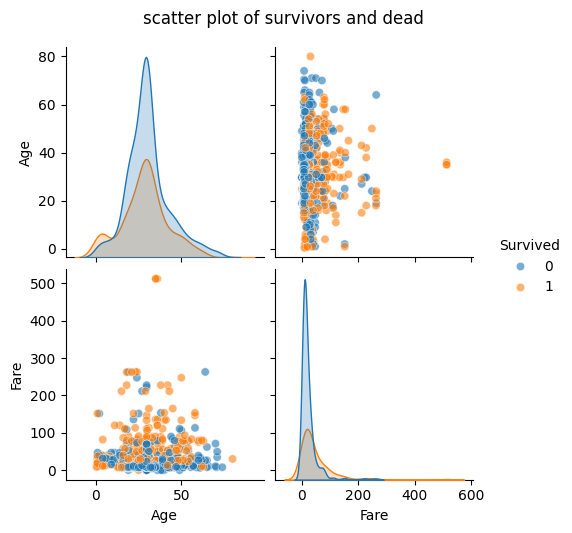

In [12]:
# Use this cell for your code
import seaborn as sns

# choose numercial variables to compare
sns.pairplot(df[["Age", "Fare", "Survived"]],
             hue="Survived",
             diag_kind="kde",
             plot_kws={"alpha":0.6})

plt.suptitle("scatter plot of survivors and dead", y=1.05)
plt.show()

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

*Use this (markdown) cell for your written answer*
It can improve data integrity and accuracy, although it introduces bias. Preserving all passenger data is more important than missing them. 

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [13]:
# Use this cell for your code
from collections import Counter

def get_words(path):
    words = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            for word in line.strip().split():
                words.append(word)
    return words
        
neg_path = "../exercise for week 1/neg.txt"
pos_path = "../exercise for week 1/pos.txt"

neg_words = get_words(neg_path)
pos_words = get_words(pos_path)

neg_counter = Counter(neg_words)
pos_counter = Counter(pos_words)

print("negative top words:", neg_counter.most_common(10))
print("positive top words:", pos_counter.most_common(10))
# pos_words includes more words about positive emotions, such as "great" and "good", but neg_words don't show negitive emotions clearly.


negative top words: [('t', 60974), ('work', 40309), ('use', 37507), ('fit', 31571), ('s', 27152), ('product', 25127), ('just', 23721), ('light', 23191), ('like', 20843), ('time', 19880)]
positive top words: [('great', 438981), ('work', 430128), ('use', 347355), ('good', 293496), ('fit', 275920), ('t', 262167), ('instal', 232403), ('product', 216643), ('s', 200719), ('look', 182815)]


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [14]:
# Use this cell for your code
from sklearn.feature_extraction.text import TfidfVectorizer

text = [" ".join(pos_words), " ".join(neg_words)]
print(len(text))

# fit_transform() calculates TF/IDF
vectorizer = TfidfVectorizer()
TF_IDF_matrix = vectorizer.fit_transform(text)

TF_IDF_array = TF_IDF_matrix.toarray()
print(TF_IDF_array.shape)
print(TF_IDF_array)

2
(2, 87816)
[[3.85513366e-04 1.25083233e-03 2.09928094e-04 ... 1.17278265e-06
  1.17278265e-06 2.34556530e-06]
 [5.02333040e-04 4.34855468e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [ ]:
# Use this cell for your code
import pandas as pd

df_TF_IDF = pd.DataFrame(TF_IDF_array, columns=vectorizer.get_feature_names_out(), index=["positive", "negative"])

top_n = 10
# 按行读取
for label in df_TF_IDF.index:
    print(f"top 10 words of {label}:")
    row = df_TF_IDF.loc[label]
    sorted_row = row.sort_values(ascending=False)
    top_words = sorted_row.head(top_n)
    
    for word, score in top_words.items():
        print(f"{word}: {score}")

# TF/IDF processes the uncleaned text in disguise, removing the remaining words, such as "doesn" and "t".
# It words as expect, showing the words related to positive and negative emotions.

top 10 words of positive:
great: 0.3663052875473672
work: 0.3589179502579245
use: 0.28984847443514805
good: 0.24490612731303196
fit: 0.23023993052106936
instal: 0.19392740857091942
product: 0.1807765630178169
look: 0.15254897397147468
just: 0.15162691278263088
like: 0.14763493022387184
top 10 words of negative:
work: 0.3022170526557523
use: 0.2812090350531966
fit: 0.23670382716998084
product: 0.18838988518894265
just: 0.1778483888473319
light: 0.17387470957204476
like: 0.15627056063171615
time: 0.14905046036360012
instal: 0.14254262336180912
look: 0.14217524546654672


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

top 100 words of positive:


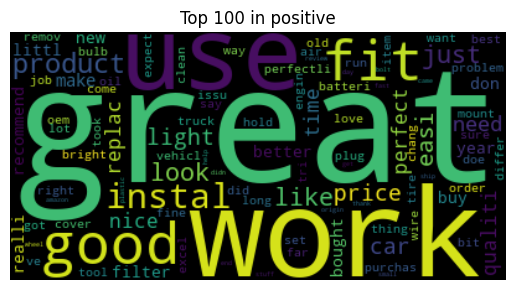

top 100 words of negative:


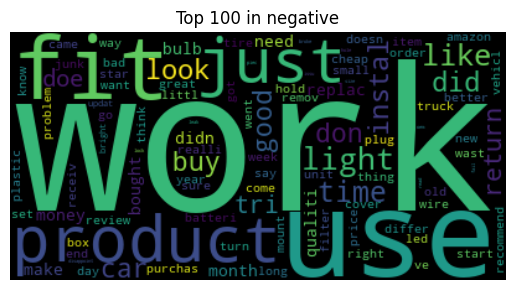

In [20]:
# Use this cell for your code
from wordcloud import WordCloud, ImageColorGenerator

top_n = 100
for label in df_TF_IDF.index:
    print(f"top {top_n} words of {label}:")
    row = df_TF_IDF.loc[label]
    sorted_row = row.sort_values(ascending=False)
    top_words = sorted_row.head(top_n)
    
    wc = WordCloud()
    wc.generate_from_frequencies(top_words.to_dict())
    
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top {top_n} in {label}")
    plt.show()



**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**